In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.svm import SVC

#make random samples belonging to two different classes
np.random.seed(5)
Xsamples = np.random.randn(40,2)
YClass = np.repeat([1,-1], 20)

#print(Xsamples)
#print(YClass)

In [2]:
#create a difference between the random generated samples by adding 1 to all class -1
Xsamples[YClass == -1] = Xsamples[YClass == -1]+1

Text(0, 0.5, 'Second dimension')

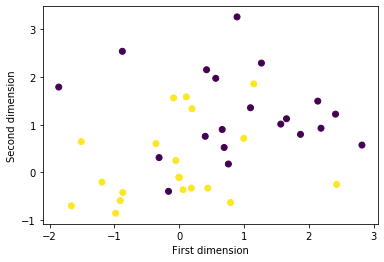

In [3]:
plt.scatter(Xsamples[:,0], Xsamples[:,1], c=YClass)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')

In [4]:
#Create the classifier as linear
supportVectorClassifier = SVC(kernel='linear')
supportVectorClassifier.fit(Xsamples, YClass)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

No handles with labels found to put in legend.


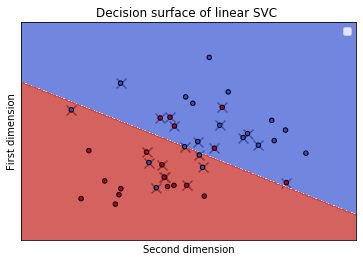

In [5]:
#Based on https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python, i plot
#the samples together with the SVC

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, supportVectorClassifier, xx, yy, **params):
    Z = supportVectorClassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xsamples[:, 0], Xsamples[:, 1]
xx, yy = make_meshgrid(X0, X1)

#Finding support vectors to plot these as X
supportVectors = supportVectorClassifier.support_vectors_
plt.scatter(supportVectors[:,0], supportVectors[:,1], c='k', marker='x', s=100, linewidths='1')

plot_contours(ax, supportVectorClassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=YClass, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('First dimension')
ax.set_xlabel('Second dimension')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [6]:
Supportvectors = supportVectorClassifier.support_
print(Supportvectors)

[20 21 24 26 29 31 32 34 35 37 38 39  0  1  2  6  8 12 14 16 17 18 19]


In [9]:
supportVectorClassifierCostLower = SVC(C=0.1,kernel='linear')
supportVectorClassifierCostLower.fit(Xsamples, YClass)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

No handles with labels found to put in legend.


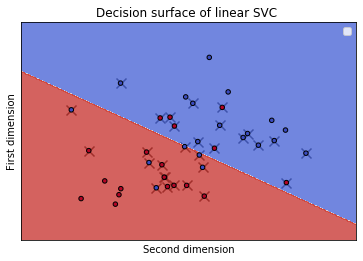

In [10]:
#Based on https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python, i plot
#the samples together with the SVC

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, supportVectorClassifierCostLower, xx, yy, **params):
    Z = supportVectorClassifierCostLower.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xsamples[:, 0], Xsamples[:, 1]
xx, yy = make_meshgrid(X0, X1)

#Finding support vectors to plot these as X
supportVectors = supportVectorClassifierCostLower.support_vectors_
plt.scatter(supportVectors[:,0], supportVectors[:,1], c='k', marker='x', s=100, linewidths='1')

plot_contours(ax, supportVectorClassifierCostLower, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=YClass, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('First dimension')
ax.set_xlabel('Second dimension')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [11]:
print(supportVectors)


[[ 0.69414698  0.52226858]
 [ 1.10073819  1.35543847]
 [ 0.66366374  0.89938565]
 [-0.31077313  0.31043477]
 [ 1.65661947  1.12480683]
 [ 0.56429608  1.97217931]
 [ 0.75928886  0.17587655]
 [ 1.56813272  1.01275832]
 [ 2.18906073  0.92640668]
 [-1.85968797  1.7893664 ]
 [-0.87774088  2.53875615]
 [ 2.82136474  0.57296861]
 [-0.16470191 -0.39707402]
 [ 1.87265462  0.79788182]
 [ 0.40164007  0.7565803 ]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [ 0.18760323 -0.32986996]
 [-0.35882895  0.6034716 ]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [ 0.99643983  0.71242127]
 [ 0.05914424 -0.36331088]
 [ 0.00328884 -0.10593044]
 [ 0.79305332 -0.63157163]
 [-0.00619491 -0.10106761]
 [-0.05230815  0.24921766]
 [ 0.19766009  1.33484857]
 [-0.08687561  1.56153229]]


In [14]:
from sklearn.model_selection import GridSearchCV
DifferentCostSettings = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
gridsearchTest = GridSearchCV(SVC(kernel='linear'), DifferentCostSettings, cv=10, scoring='accuracy')
gridsearchTest.fit(Xsamples, YClass)
#Getting cross validation results.
gridsearchTest.cv_results_


{'mean_fit_time': array([3.99088860e-04, 3.89862061e-04, 2.99596786e-04, 2.02274323e-04,
        3.02577019e-04, 1.77383423e-05, 9.96971130e-04]),
 'std_fit_time': array([4.88782062e-04, 4.77566195e-04, 4.57642164e-04, 4.04623516e-04,
        4.62257848e-04, 5.32150269e-05, 4.47310162e-04]),
 'mean_score_time': array([2.02560425e-04, 1.99437141e-04, 3.98516655e-04, 2.00581551e-04,
        1.99198723e-04, 5.81026077e-05, 0.00000000e+00]),
 'std_score_time': array([0.00040519, 0.00039887, 0.00048831, 0.00040116, 0.0003984 ,
        0.00017431, 0.        ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.75, 0.75]),
 'split1_test_score': array([0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75])

In [15]:
gridsearchTest.best_params_

{'C': 0.001}

In [20]:
#Creating test samples like the random samples used in the models
XTestSamples = np.random.randn(40,2)
YTestClass = np.repeat([1,-1], 20)
XTestSamples[YTestClass == -1] = XTestSamples[YTestClass == -1]+1
#we can reuse the former SVC to predict the new samples, since it was created with cost 0.1
test = supportVectorClassifierCostLower.predict(XTestSamples)
print(test)

[ 1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1]


In [23]:
XTestSamples[YTestClass == 1] = XTestSamples[YTestClass == 1]-2
test = supportVectorClassifierCostLower.predict(XTestSamples)
print(test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


No handles with labels found to put in legend.


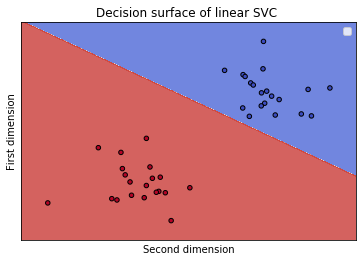

In [25]:
#Based on https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python, i plot
#the samples together with the SVC

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, supportVectorClassifierCostLower, xx, yy, **params):
    Z = supportVectorClassifierCostLower.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = XTestSamples[:, 0], XTestSamples[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, supportVectorClassifierCostLower, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=YTestClass, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('First dimension')
ax.set_xlabel('Second dimension')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()